In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  accuracy_score

In [68]:
data = fetch_california_housing()
X=data.data
y=data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())
print(X.shape, y.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
(20640, 8) (20640,)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Most correlated features with PRICE: ['MedInc', 'AveRooms']


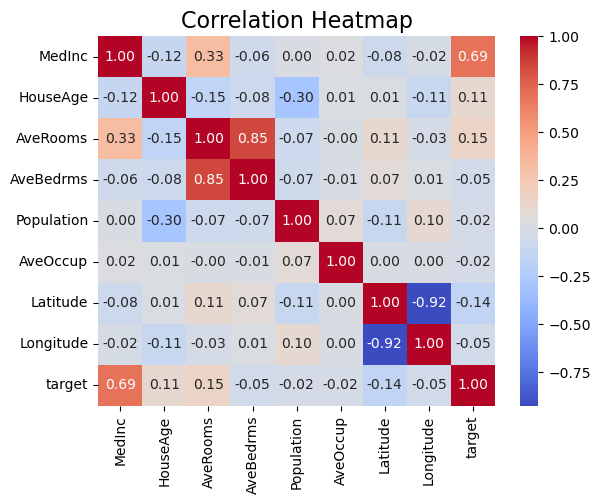

In [70]:
correlation_Mat= df.corr()
most_correlated_features = correlation_Mat['target'].sort_values(ascending=False).index[1:3]
print(f"Most correlated features with PRICE: {most_correlated_features.tolist()}")

sns.heatmap(correlation_Mat, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Text(0, 0.5, 'PRICE')

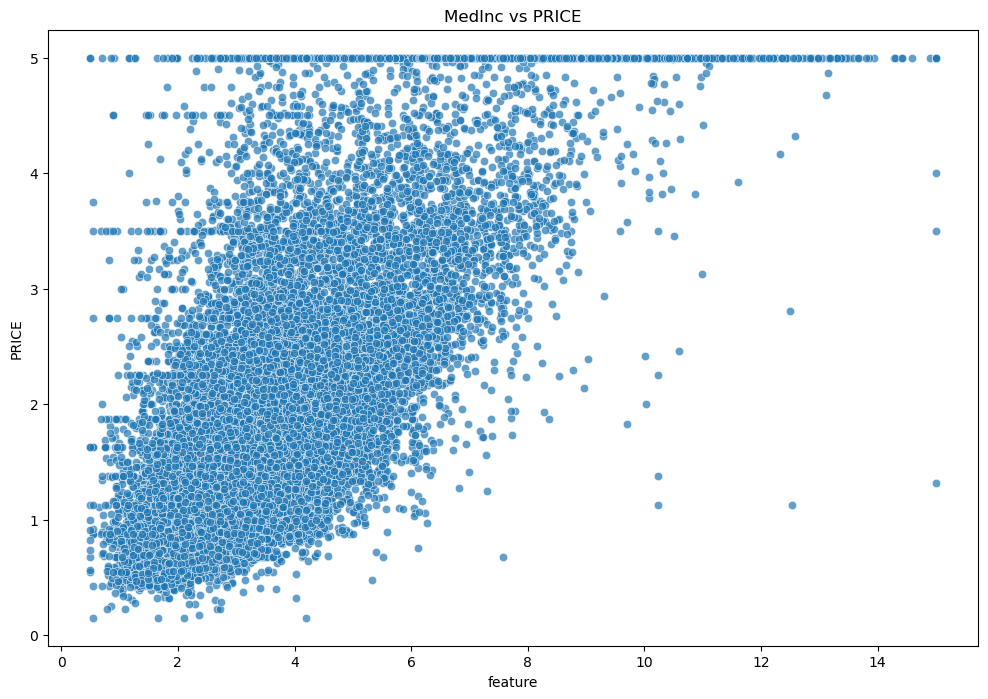

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=most_correlated_features[0], y='target', alpha=0.7)
plt.title("MedInc vs PRICE")
plt.xlabel('feature')
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

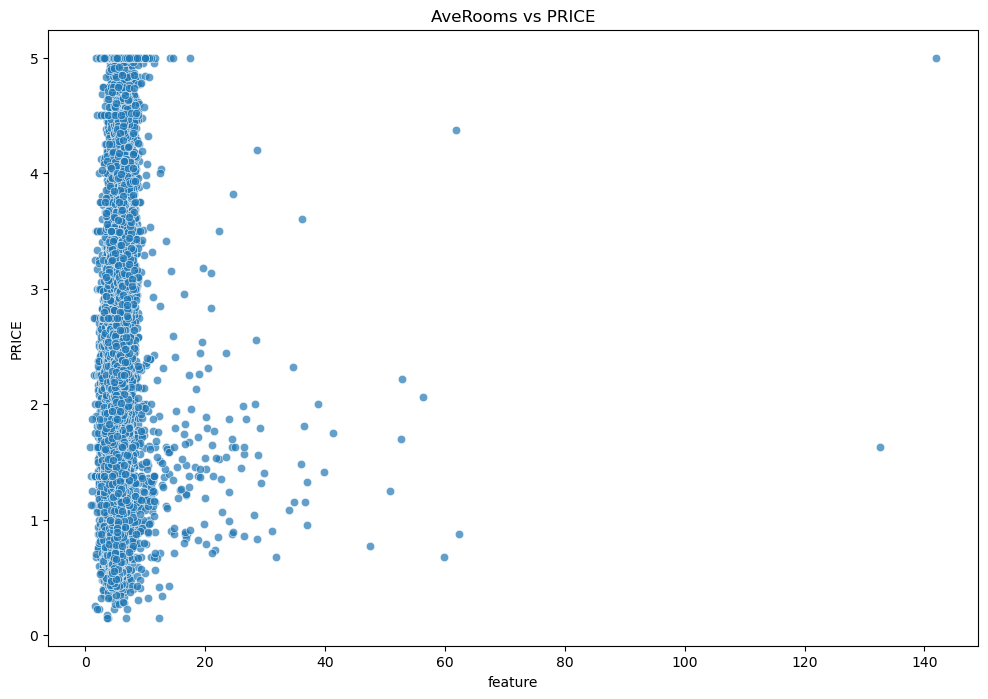

In [72]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=most_correlated_features[1], y='target', alpha=0.7)
plt.title("AveRooms vs PRICE")
plt.xlabel('feature')
plt.ylabel("PRICE")

In [73]:
df_new = df[most_correlated_features.tolist()+['target']]
print(df_new.head())

   MedInc  AveRooms  target
0  8.3252  6.984127   4.526
1  8.3014  6.238137   3.585
2  7.2574  8.288136   3.521
3  5.6431  5.817352   3.413
4  3.8462  6.281853   3.422


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred)
r2_full = r2_score(y_test, y_pred)

print(f"Mean Squared Error with all features: {mse_full:.2f}")
print(f"R^2 Score with all features: {r2_full:.2f}")
# print(f"Accuracy: {accuracy:.2f}")

Mean Squared Error with all features: 0.56
R^2 Score with all features: 0.58


In [77]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(df_new[most_correlated_features.tolist()], df_new['target'], test_size=0.2, random_state=42)
lr.fit(X_train_fs, y_train_fs)
y_pred_fs = lr.predict(X_test_fs)
mse_fs = mean_squared_error(y_test, y_pred_fs)
r2_fs = r2_score(y_test, y_pred_fs)

print(f"Mean Squared Error with features selection: {mse_fs:.2f}")
print(f"R^2 Score with features selection: {r2_fs:.2f}")

Mean Squared Error with features selection: 0.70
R^2 Score with features selection: 0.46


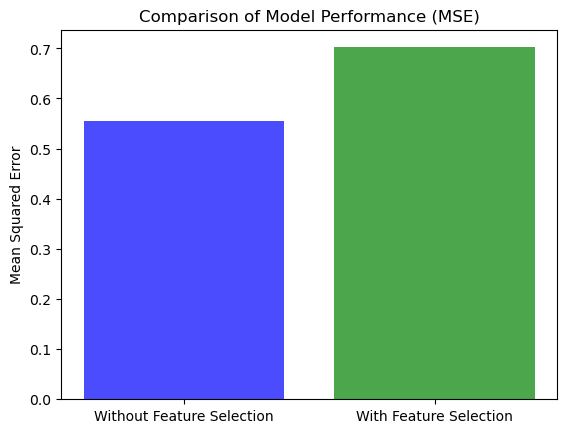

In [78]:
metrics = ['Without Feature Selection', 'With Feature Selection']
mse_values = [mse_full, mse_fs]
plt.bar(metrics, mse_values, color=['blue', 'green'], alpha=0.7)
plt.title('Comparison of Model Performance (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()